In [2]:
# Main train runner

from pytorch_lightning import Trainer
from data.data_loaders import DeepFashionDatasetAdaptor, EfficientDetDataModule, TRAIN, VALIDATION
from models.efficient_det_model import EfficientDetModel

In [6]:
# Build the dataset interface
deepfashion_ds_train = DeepFashionDatasetAdaptor(TRAIN)
deepfashion_ds_validation = DeepFashionDatasetAdaptor(VALIDATION)
dm = EfficientDetDataModule(train_dataset_adaptor=deepfashion_ds_train, 
        validation_dataset_adaptor=deepfashion_ds_validation,
        num_workers=4,
        batch_size=8)

tensor([[102,   1, 467, 313],
        [ 34, 174, 294, 504]]) ['item', 'item'] (468, 624)


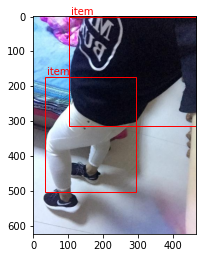

In [7]:
# Visualize
deepfashion_ds_train.show_image(5893)

In [2]:
# Build the model
model = EfficientDetModel(
    num_classes=1,
    img_size=512)

# Run training
trainer = Trainer(gpus=[0], max_epochs=10, num_sanity_val_steps=1)

# Train
trainer.fit(model, dm)

{'name': 'tf_efficientnetv2_l', 'backbone_name': 'tf_efficientnetv2_l', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [512, 512], 'num_classes': 1, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [[1.0, 1.0], [1.4, 0.7], [0.7, 1.4]], 'anchor_scale': 4.0, 'pad_type': 'same', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 88, 'separable_conv': True, 'apply_resample_bn': True, 'conv_bn_relu_pattern': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': True, 'head_bn_level_first': False, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detection_points': 5000, 'max_det_per_image': 100, 'url': ''}

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


NameError: name 'dm' is not defined

In [4]:
# Load model from checkpoint
ckpt_file_path = 'models/efficientdet_checkpoints/epoch=9-step=239949.ckpt'
model = EfficientDetModel.load_from_checkpoint(ckpt_file_path)
model.eval()

{'name': 'tf_efficientnetv2_l', 'backbone_name': 'tf_efficientnetv2_l', 'backbone_args': {'drop_path_rate': 0.2}, 'backbone_indices': None, 'image_size': [512, 512], 'num_classes': 1, 'min_level': 3, 'max_level': 7, 'num_levels': 5, 'num_scales': 3, 'aspect_ratios': [[1.0, 1.0], [1.4, 0.7], [0.7, 1.4]], 'anchor_scale': 4.0, 'pad_type': 'same', 'act_type': 'swish', 'norm_layer': None, 'norm_kwargs': {'eps': 0.001, 'momentum': 0.01}, 'box_class_repeats': 3, 'fpn_cell_repeats': 3, 'fpn_channels': 88, 'separable_conv': True, 'apply_resample_bn': True, 'conv_bn_relu_pattern': False, 'downsample_type': 'max', 'upsample_type': 'nearest', 'redundant_bias': True, 'head_bn_level_first': False, 'head_act_type': None, 'fpn_name': None, 'fpn_config': None, 'fpn_drop_path_rate': 0.0, 'alpha': 0.25, 'gamma': 1.5, 'label_smoothing': 0.0, 'legacy_focal': False, 'jit_loss': False, 'delta': 0.1, 'box_loss_weight': 50.0, 'soft_nms': False, 'max_detection_points': 5000, 'max_det_per_image': 100, 'url': ''}

EfficientDetModel(
  (model): DetBenchTrain(
    (model): EfficientDet(
      (backbone): EfficientNetFeatures(
        (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
        (bn1): BatchNormAct2d(
          32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): SiLU(inplace=True)
        )
        (blocks): Sequential(
          (0): Sequential(
            (0): ConvBnAct(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn1): BatchNormAct2d(
                32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True
                (drop): Identity()
                (act): SiLU(inplace=True)
              )
              (drop_path): Identity()
            )
            (1): ConvBnAct(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn1): BatchNormAct2d(
    

/tmp/ipykernel_71281/476092835.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  visualize.show_labeled_image(image, torch.tensor(boxes), labels)


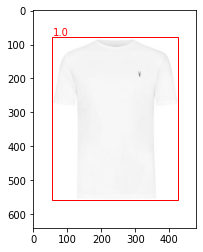

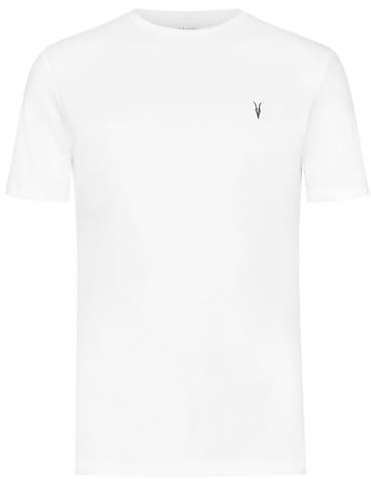

In [10]:
# Visualize some outputs
from detecto import visualize
import torch
from data.embeddings_dataset_dataloader import random_test_image
from PIL import Image

def visualize_prediction(image):
    boxes, labels, confidences = model.predict([image])
    boxes = torch.tensor(boxes[0])
    labels = labels[0]
    visualize.show_labeled_image(image, torch.tensor(boxes), labels)
    clothing_images = []
    for box in boxes:
        cropped_image = image.crop((int(val) for val in box))
        clothing_images.append(cropped_image)
        display(cropped_image)
    return clothing_images

for _ in range(1):
    # image = random_test_image()
    image = Image.open("/tmp/scraped_dataset/0400018247713_A0.jpg").convert("RGB")
    cropped_images = visualize_prediction(image)

/tmp/ipykernel_3138/1035723795.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  visualize.show_labeled_image(image, torch.tensor(boxes), labels)


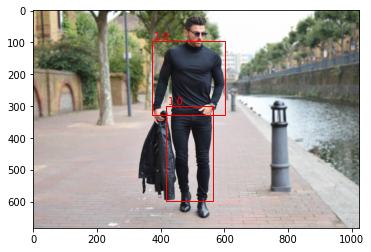

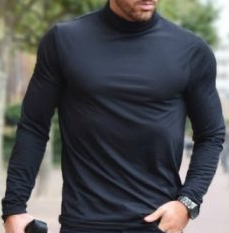

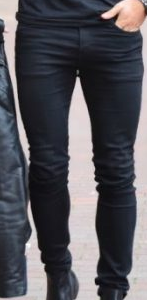

[<PIL.Image.Image image mode=RGB size=229x233 at 0x7FB1E5ED2190>, <PIL.Image.Image image mode=RGB size=147x300 at 0x7FB1EB1A3640>]


In [35]:
from PIL import Image

img = Image.open("test_example.jpg").convert("RGB")
imgs = visualize_prediction(img)
print(imgs)